# Multi-layer Perceptron

Multi-layer perceptron is also known as a feedforward artifical neural network. Unlike the single layer perceptron the MLP is capable of classifying non-linear data.

### Activation Function

If the activation function for the MLP is linear than the MLP will act as a single-layer perceptron. Otherwise it's way more useful to look towards non-linear activation functions. The main activation function that we're interested in is the sigmoid function:

\begin{align}
y(t) = \frac{1}{1 + e^{-t}}
\end{align}

### Layers

The MLP has three or more layers. An input layer, an output layer and one or more hidden layers. This makes it a deep neural network. Forward propogation is the process of moving through the layers towards the output to get a prediction. 


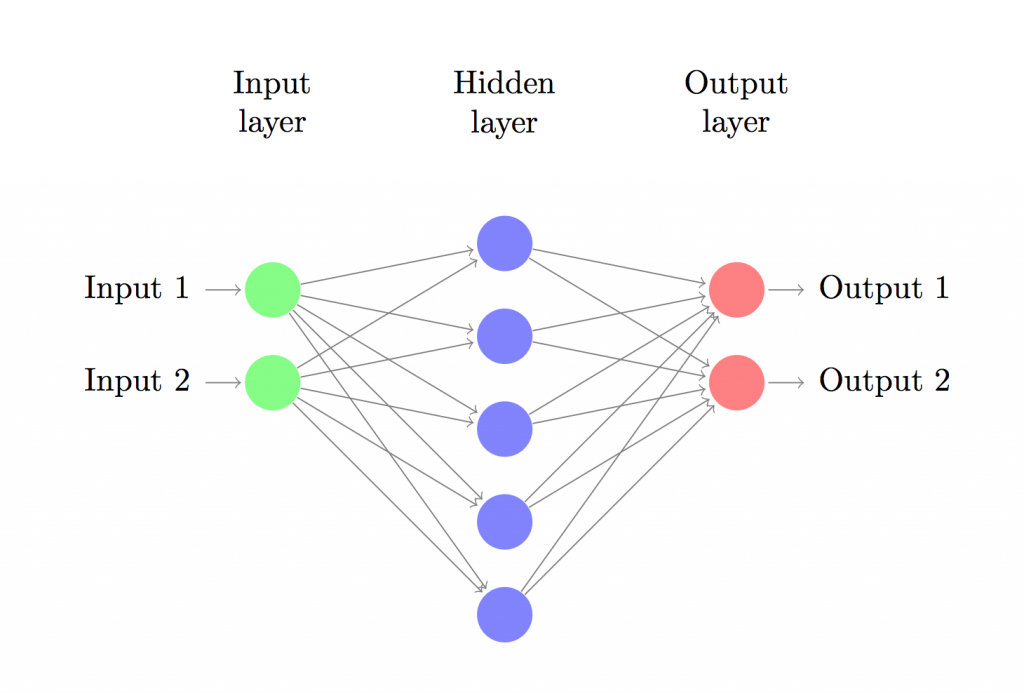

In [2]:
from IPython.display import Image
Image(filename='../images/3layerneuralnet.png')

### Backpropogation

The MLP makes use of backpropogation in order to learn. It us often used in conjunction with an optimization method such as gradient descent. It repeats a two stage cycle: propogate and weight update. The process essentially involves:
1. Phase 1. Propogation.
    - an input forward propogating through the network layer by layer until it reaches the output. 
    - At that point an error value is calculated using a loss function.
    - The error value is propogated backwards through the network
    - This will continue until each neuron has an associated error value for its contribution to the output
    - The error values are used to calculate the gradient of the loss function with respect to the network
2. Phase 2. Weight update.
    - Gradient is fed to the optimization method 
    - Optimization method updates the weights and tries to minimize the loss function
    
Before we go into our implementation let's review the mathematics behind backpropogation:

#### Computational Graphs and Propogation

Prior to moving forward we need to read the contents [here](http://colah.github.io/posts/2015-08-Backprop/) in order to understand the computation graph model we'll be using for the math behind backpropogation. Read up to just before Factoring Paths at least. 

As mentioned in the article we can understand that for the computation graph we can take the partial derivative on each edge connecting two nodes. 

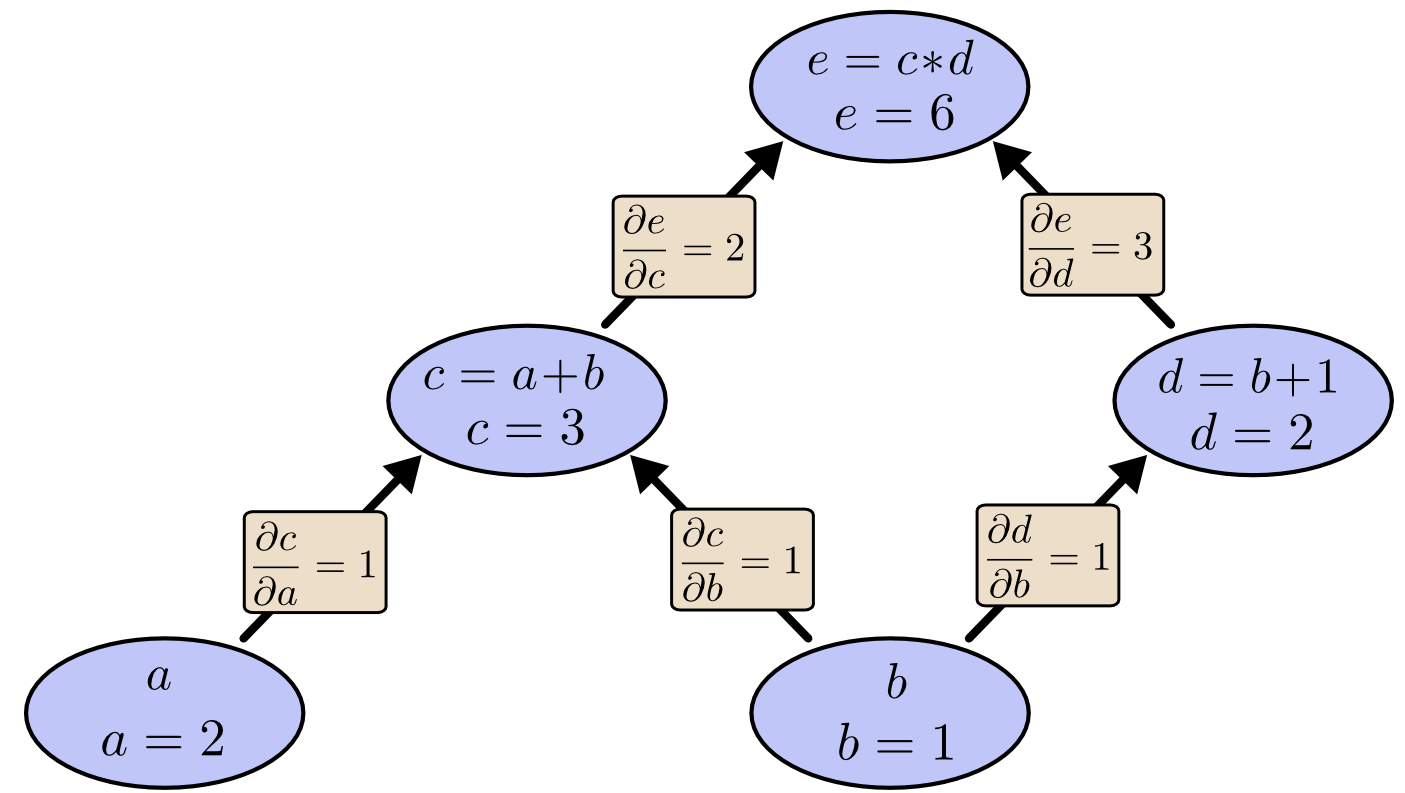

In [3]:
Image(filename='../images/tree-eval-derivs.png')

We can get the partial derivative from $e$ with respect to $b$ by summing the path i.e. $ 1*2 + 1*3 = 5 $. This can be explained by the multivariate chain rule ($ \frac{\partial u}{\partial t} = \frac{\partial u}{\partial v} \cdot \frac{\partial v}{\partial t} $). 

Summing seems straightforward right now but it's easy to see that complex paths can result in very complex sums.

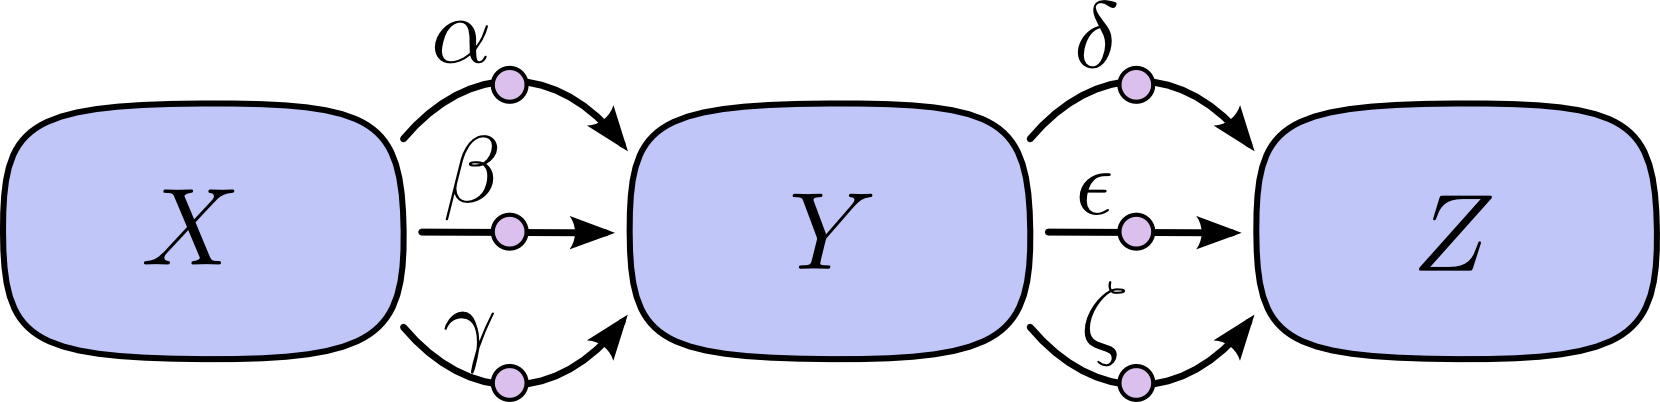

In [4]:
Image(filename='../images/chain-def-greek.png')

With the diagram above we can get the following derivative with the sum of paths but take it a step further by factoring the paths. 
    
\begin{align}
\frac{dZ}{dX} & = \alpha \delta + \alpha \epsilon + \alpha \zeta + \beta \delta + \beta \epsilon + \beta \zeta + \gamma \delta + \gamma \epsilon + \gamma \zeta \\
& = (\alpha + \beta + \gamma)(\delta + \epsilon + \zeta)
\end{align}

By doing that we get to drastically reduce the number of computations we make. Knowing that we can develop two techniques to make our lives much easier.

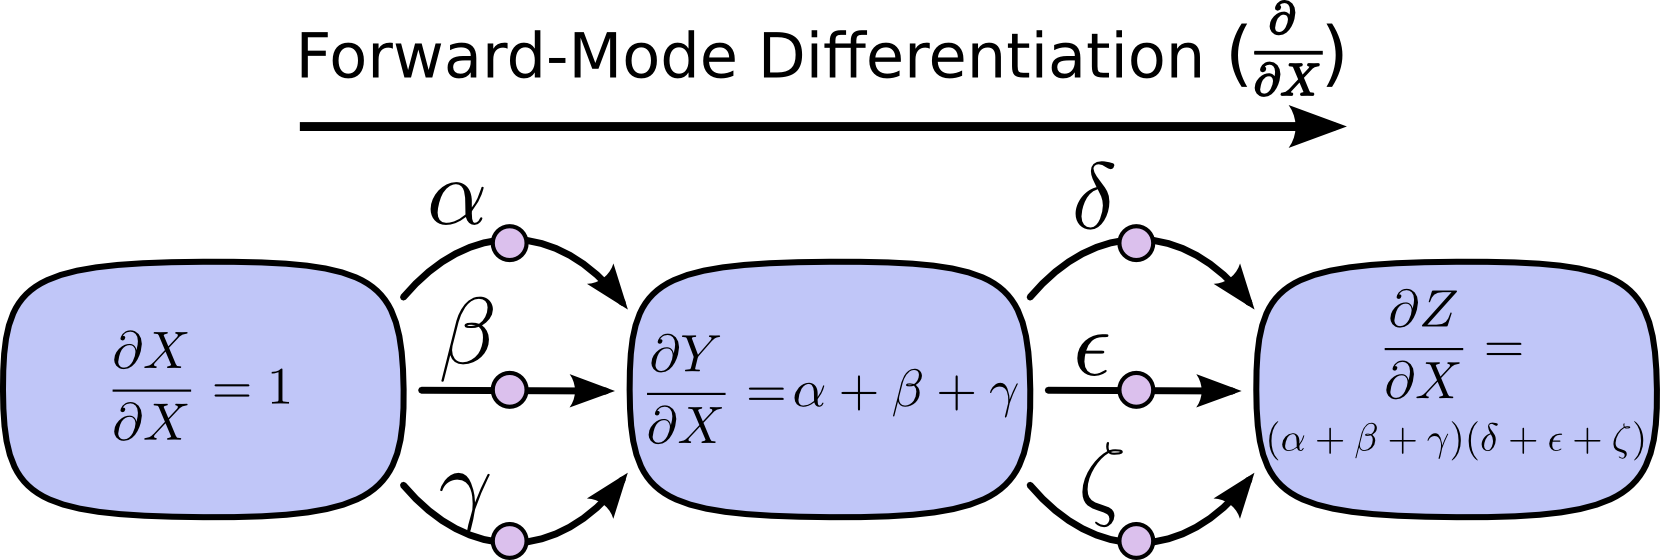

In [5]:
Image(filename='../images/chain-forward-greek.png')

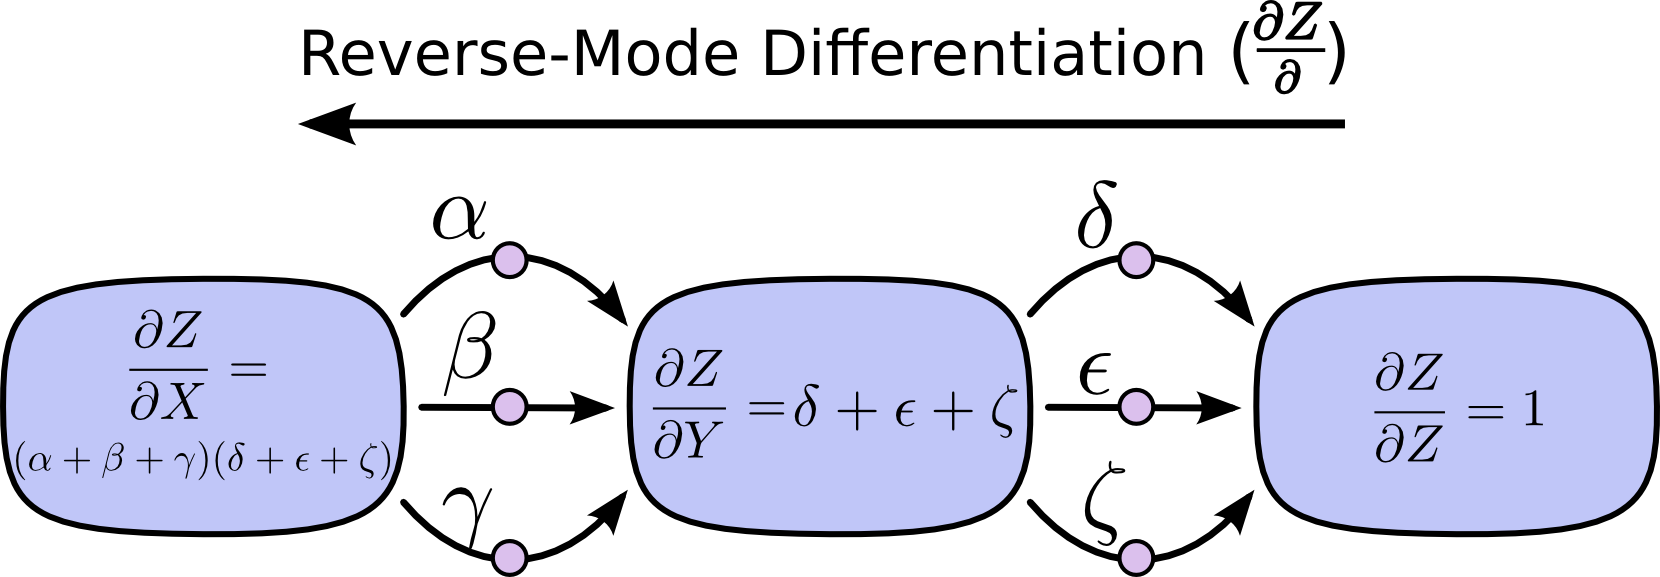

In [6]:
Image(filename='../images/chain-backward-greek.png')

#### Backpropogation and Minimizing Loss 

Our purpose for using backpropogation is straightforward. We want to minimize the error (the loss function) of the network by adjusting weights. To begin we can note that we can understand activation of the network works as follows for layers **n** and **n+1**:

\begin{align}
 y_n & = f(x_n) \\
 x_{n+1} & = w_n y_n
\end{align}

Next we can define the error of the network through the loss function. Knowing that **N** is the last layer within the network (the output layer):

\begin{align}
c = \frac{1}{2}(y_N - t)^2
\end{align}

With the error gradient at layer **n** being:

\begin{align}
\sigma_n & = \frac{\partial c}{\partial x_n} \\
         & = \frac{\partial c}{\partial x_{n+1}} \cdot \frac{\partial x_{n+1}}{\partial x_n} \\
         & = \sigma_{n+1} \cdot \frac{\partial x_{n+1}}{\partial x_n}  ^ {[note \space 1]} \\
         & = \sigma_{n+1} \cdot \frac{\partial w_n y_n}{\partial x_n} ^ {[note \space 2]} \\
         & = \sigma_{n+1} \cdot \frac{\partial w_n y_n}{\partial x_n} \cdot \frac{\partial y_n}{\partial y_n} \\
         & = \sigma_{n+1} \cdot \frac{\partial w_n y_n}{\partial y_n} \cdot \frac{\partial y_n}{\partial x_n} \\
         & = \sigma_{n+1} \cdot w_n \cdot \frac{\partial y_n}{\partial x_n} \\ 
         & = \sigma_{n+1} \cdot w_n \cdot f'(x_n)
\end{align}

- [note 1] Since c is the constant expression for the network we can transform this into $\sigma_{n+1}$
- [note 2] Recall from the start of this section where we defined  $ x_{n+1} = w_n y_n $

So it seems that for any layer **n** we have an error gradient that consists of the product of the following:
- Error gradient of the next layer 
- weight of that layer 
- the derivative of the activation function (in our case the derivative of the sigmoid function)

Now what about for layer **N**, the last layer?

\begin{align}
\sigma_N & = \frac{\partial c}{\partial x_N} \\
         & = \frac{\partial}{\partial x_N} \frac{1}{2} (y_N - t)^2 \\ 
         & = \frac{\partial}{\partial x_N} \frac{1}{2} (y_N - t)^2 \cdot \frac{\partial y_N}{\partial x_N} \\ 
         & = \frac{\partial}{\partial y_N} \frac{1}{2} (y_N - t)^2 \cdot \frac{\partial y_N}{\partial x_N} \\
         & = (y_N - t) \cdot \frac{\partial y_N}{\partial x_N} \\
         & = (y_N - t) \cdot  f'(x_N)
\end{align}

Knowing that we can construct the piecewise function for \sigma_n

\begin{align}
\sigma_n = f'(x_n) \{  \begin{array} 1 (y_N - t) \space if \space n = N \\ \sigma_{n+1} y_n \space if n < N \end{array}
\end{align}

The error gradient of the weights matrix:

\begin{align}
\frac{\partial c}{\partial w_n} & = \frac{\partial c}{\partial x_{n+1}} \cdot \frac{\partial x_{n+1}}{\partial w_n} \\ 
& = \sigma_{n+1} \frac{\partial w_n y_n}{w_n} ^ {[note 1]}\\
& = \sigma_{n+1} y_n
\end{align}

- [note 1] $\frac{\partial x}{x} = 1$

If we know the error gradient of each weight then we can request an adjustment for the weight accordingly. The change in weight should be:

\begin{align}
\Delta w_n = \sigma_{n+1} y_n
\end{align}

Now since we know all that let's start implementing the algorithm.

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


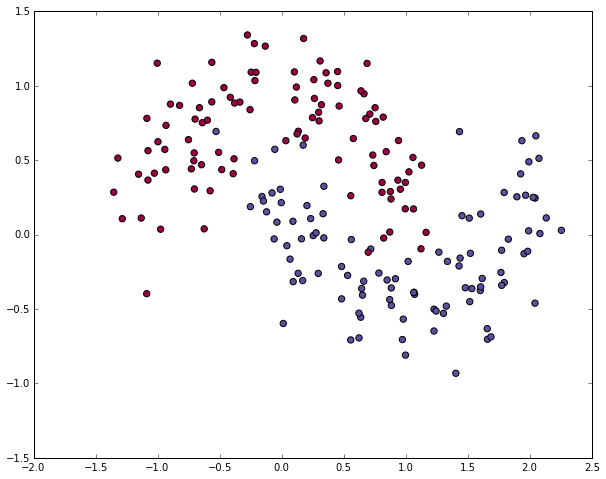

In [7]:
# Package imports
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib

# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

# Generate a dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

As can be seen above, we used sklearn to generate a dataset. We will train a 3-layer neural network.

- Our hidden layer will use the activation function of $tanh(x)$ rather than the exponential sigmoid described above.
- Our output layer will use the [softmax function](https://en.wikipedia.org/wiki/Softmax_function) in order to convert the raw scores into probabilities. This is essentially a generalized multi-class variation of the exponentional sigmoid we're familiar with. We need to use this since our output has multiple dimensions.

Knowing that we can start to look to how we'll be making predictions for our dataset. 

**Forward Propogation**

We know that our input is a 2-dimensional vector and our predicted output, $\hat{y}$, is also 2-dimensional. We can then define the following:

\begin{align}
z_1 & = x \cdot w_1 + b_1 \\
a_1 & = tanh(z_1) \\
z_2 & = a_1 \cdot W_2 + b_2 \\
a_2 & = \hat{y} = softmax(z_2)
\end{align}

- $z_i$ is the input of layer $i$ while $a_i$ is the output of layer $i$.
- b_i is the bias for layer i
- w_i is the weight vector for layer i
- As we'd expect during forward propogation we can use the two formulas we discussed at the start of the Backpropogation and Minimizing Loss section ($y_n = f(x_n)$ and $x_{n+1} = w_n y_n$)

Our goal is to minimize the parameters $w_1$, $b_1$, $w_2$ and $b_2$. 

**Loss Function**

The loss function defines the error that we want to minimize within the network. For this problem, mainly due to the fact that we suggested a softmax output, we choose to utilize the cross-entropy loss function. 

\begin{align}
L(y, \hat{y}) = - \frac{1}{N} \sum_{n \in N} \sum_{i \in C} y_{n,i} log \hat{y}_{n,i}
\end{align}

- N training samples and C classes. For us we'll have 2 classes due to 2-dimensional output.
- The loss is calculated with our predicted output $\hat{y}$ with respect to the true output from training set $y$

**Gradient Descent**

Earier we mentioned that backpropogation is used in conjunction with gradient descent. Within this implementation we use batch gradient descent with a fixed learning rate. This is a vanilla approach and often we find better use in using variations with stuff like decaying learning rate. Gradient descent will allow us to find the minimum.

- **$ \sigma_3 = \hat{y} - {y} $**. The error of the third layer, the output layer. This is where we start. As can be seen by the reverse-mode differentiation diagram above we can start by simply subtracting the output of this layer (which is the output of the network) by the desired/true output. 
- **$ \sigma_2 = (1 - tanh^2 z_1) (\sigma_3 \cdot w_2^T)$**. The error of the second layer, the only hidden layer we have. We start the propogation process here by bringing back the error from the third layer, the output layer. Also recall $ \sigma_n = \sigma_{n+1} \cdot w_n \cdot f'(x_n) $. 
    - $ f'(x_n) $ is $(1 - tanh^2 z_1)$ since our activation function, $f$, is $tanh$.
    - We use the transposed weight vector for backpropogation. We need to do this in order to be able to do element-wise multiplication against the output vectors.
- **$ \frac{\partial{L}}{\partial w_2} = {a_1}^T \sigma_3 $**. The loss of $w_2$, which lies in the second layer. This is the error of the next layer (the network / output layer) multiplied by the input of this layer, the hidden layer.
- **$ \frac{\partial{L}}{\partial b_2} = \sigma_3 $**.  The loss of $b_2$, which lies in the second layer. Follows a similar explanation to above.
- **$ \frac{\partial{L}}{\partial w_1} = {x}^T \sigma_2 $**. The loss of $w_1$, which lies in the first layer. This is the error of the next layer 
- **$ \frac{\partial{L}}{\partial b_1} = \sigma_2 $**. The loss of $b_1$, which lies in the first layer. This is the error of the next layer, the hidden layer multiplied by the input of this layer, the input layer. 

Note that $\sigma_1$ does not exist since that is the input layer. 

**Regularization**

Regularization is the concept of applying a penalty to increasing the magnitude of a parameter value. This helps us avoid overfitting. For example, what if we have a lot of parameters but not much data? The model may fit the parameters to the data perfectly but future data may not since some parameters may have a different impact than the model predicted. Thus we can take the approach:
- minimize the loss function as we discussed above 
- also minimize a function which penalizes large values of a parameter. Chances are this function will be $\lambda \sum \theta_j$, where $\theta$ is the parameter and $\lambda$ is the regularization strength. The larger we make $\lambda$ the less likely a parameter will increase in magnitude just to adjust to a small perturbation in the data. Often we set $ C = \frac{1}{\lambda} $ instead of $\lambda$ outright with sklearn.

The bright points are correctly classified, the dark points are incorrectly classified


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


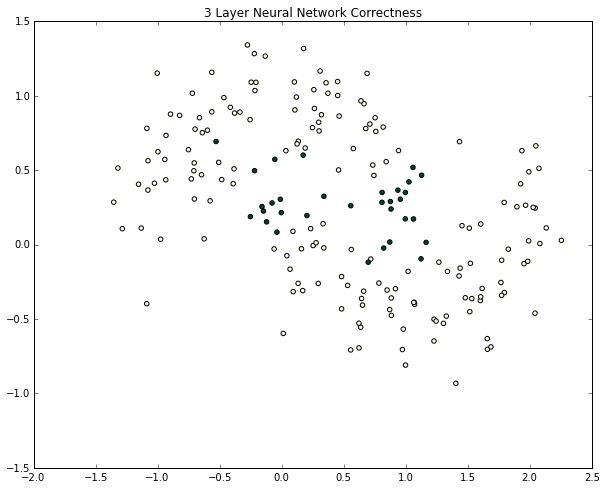

In [8]:
TRAINING_SIZE = len(X) # size of our training set 
nn_input_dim = 2       # input layer dimensionality
nn_output_dim = 2      # output layer dimensionality

# Gradient descent parameters 
learning_rate = 0.01   # learning rate (as discussed above)
reg_lambda = 0.01      # regularization strength

def softmax(vec):
    exp_scores = np.exp(vec) # get e^k for vector 
    return exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # normalize by dividing by its sum

def cross_entropy(vec):
    c = -np.log(vec[range(TRAINING_SIZE), y])
    data_loss = np.sum(c)
    # Add regularization 
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    # Final result is 1/N * data_loss 
    return 1/TRAINING_SIZE * data_loss
    
def calculate_loss(model):
    w1, b1, w2, b2 = model['w1'], model['b1'], model['w2'], model['b2']
    
    # Forward propogate to get prediction 
    z1 = X.dot(w1) + b1 
    a1 = np.tanh(z1)
    z2 = a1.dot(w2) + b2
    a2 = softmax(z2)
    
    # Calculate cross entropy loss 
    return cross_entropy(a2) 
    
def predict(model, x):
    w1, b1, w2, b2 = model['w1'], model['b1'], model['w2'], model['b2']
    
    # Forward propogate to get prediction 
    z1 = X.dot(w1) + b1 
    a1 = np.tanh(z1)
    z2 = a1.dot(w2) + b2
    a2 = softmax(z2)
    
    return np.argmax(a2, axis=1) # return class with highest probability 


"""
    nn_hdim: Number of hidden layers
    num_passes: Number of passes for gradient descent
"""
def build_model(nn_hdim, num_passes=20000):
    # Initialize parameters
    np.random.seed(0) # re-seed generator to make random numbers predictable
    w1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    w2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))
    
    # Model dictionary to be built on top of 
    model = {}
    
    # Gradient descent, based on number of passes
    for i in range(0, num_passes):
        # Now let's train all the examples (like discussed above)
        
        # Forward propogate to get prediction 
        z1 = X.dot(w1) + b1 
        a1 = np.tanh(z1)
        z2 = a1.dot(w2) + b2
        a2 = softmax(z2)
        
        # Backpropogation
        sigma3 = a2
        sigma3[range(TRAINING_SIZE), y] -= 1 # Accomplish a2 - y by subtracting desired output values that are 1
        
        sigma2 = (1 - np.power(a1, 2)) * sigma3.dot(w2.T)
        
        dl_w2 = np.dot(a1.T, sigma3)
        dl_b2 = np.sum(sigma3, axis=0, keepdims=True) 
        dl_w1 = np.dot(X.T, sigma2)
        dl_b1 = np.sum(sigma2, axis=0, keepdims=True)
        
        dl_w2 += reg_lambda * w2
        dl_w1 += reg_lambda * w1
        
        w1 += -learning_rate * dl_w1
        b1 += -learning_rate * dl_b1
        w2 += -learning_rate * dl_w2
        b2 += -learning_rate * dl_b2
        
        model = { 'w1': w1, 'b1': b1, 'w2': w2, 'b2': b2}
        return model

# Build a model with a 3-dimensional hidden layer
model = build_model(3)

# The next few lines are dedicated to plotting the decision boundary 
# Helper function to plot a decision boundary.
print("The bright points are correctly classified, the dark points are incorrectly classified")
tested_correctness = np.logical_xor(predict(model, X), y)
plt.scatter(X[:, 0], X[:, 1], c=tested_correctness, cmap=plt.cm.YlGn)
plt.title('3 Layer Neural Network Correctness')

Overall we see a decent classifier with some notable in accurate classifications. We can note above that we had the entire dataset in a 2-D dimensional vector X. This means every time an operation was done on X all the examples would be used in the calculation at once.

One thing that we didn't discuss above was the number of nodes in the hidden layer and the number of passes (`nn_hdim`). That's covered [here](http://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw).